In [47]:
import pandas as pd
import sqlite3

In [48]:
try:
  connect = sqlite3.connect('../data/checking-logs.sqlite')
  print('OK. Connected to sqlite')

except sqlite3.Error as error:
  print('Error with connection:', error)

OK. Connected to sqlite


In [49]:
query = '''
SELECT timestamp as date
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(query, connect, parse_dates=['date'])
# commits['date'] = commits.timestamp.dt.date
commits

,date
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [50]:
commits['time'] = pd.cut(commits['date'].dt.hour,
                         bins=[-1, 4, 10, 17, 24],
                         labels=['night', 'morning', 'afternoon', 'evening'])
commits['date'] = commits['date'].dt.date
commits

,date,time
0,2020-04-17,morning
1,2020-04-17,morning
2,2020-04-17,morning
3,2020-04-17,morning
4,2020-04-17,morning
...,...,...
3202,2020-05-21,evening
3203,2020-05-21,evening
3204,2020-05-21,evening
3205,2020-05-21,evening


In [51]:
commits_group = commits.groupby('time').date.value_counts().unstack(0)
commits_group

time,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


<Axes: title={'center': 'Commits per day'}, xlabel='date'>

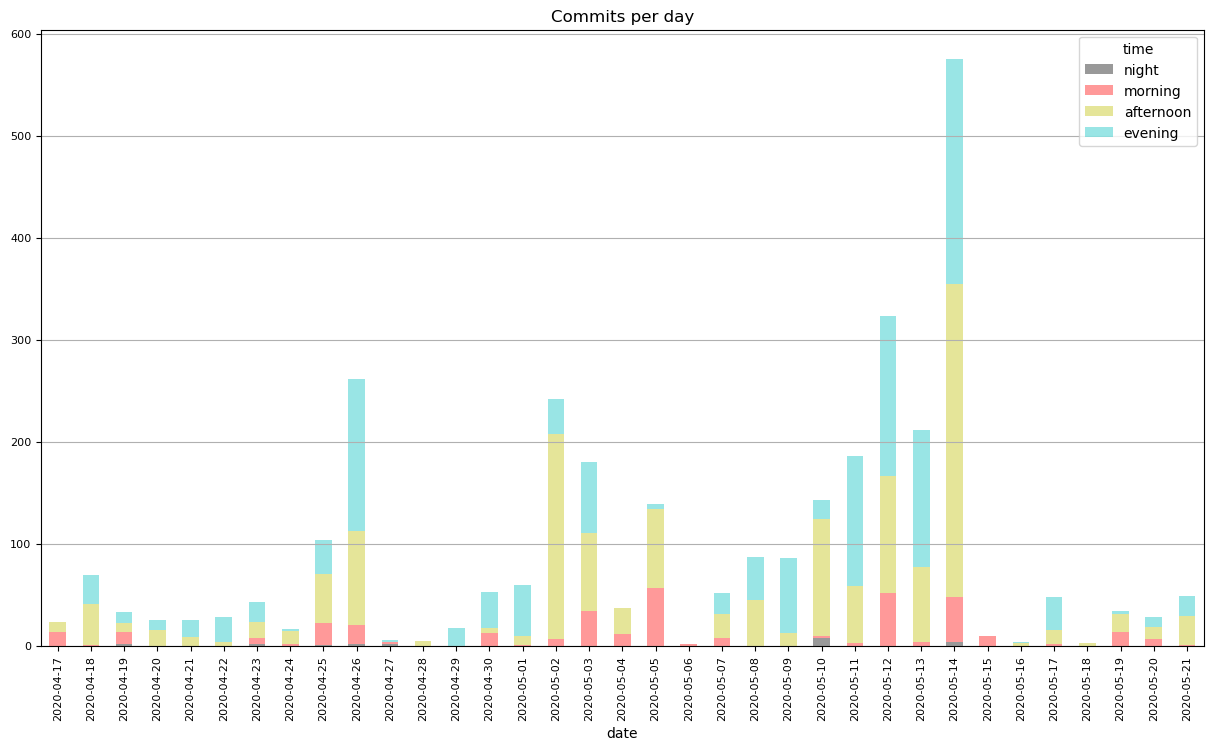

In [52]:
plt = commits_group.plot.bar(figsize=(15, 8),
                                         fontsize=8,
                                         title='Commits per day',
                                         rot=90,
                                         alpha=0.4,
                                         stacked=True,
                                         color=('black', 'red', 'y', 'c'))
plt.grid(axis='y')
plt

In [53]:
connect.close()

## «Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?», ответ — два наиболее распространенных периода.

In [54]:
commits_group.sum()


time
night          21
morning       344
afternoon    1473
evening      1369
dtype: int64

### Ответ1: afternon и evening имеют наибольшее количество комметариев

In [55]:
print('Answer: ', commits_group[commits_group['evening'] > commits_group['afternoon']].sum(axis=1).idxmax())

Answer:  2020-05-12
